It's completely unsupervised, you just need to enter the cell data into the method to make the correction

In [1]:
%matplotlib inline
import sys
print(sys.version)
from BDACL import BDACLModel
import scanpy as sc

3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]


In [2]:
data_dir="E:/研究生记录/代码/BDACL/tutorial_data/Luecken_sim2/sim2_norm.h5ad"
adata_raw=sc.read(data_dir)
adata_raw

AnnData object with n_obs × n_vars = 19318 × 10000
    obs: 'Cell', 'Batch', 'Group', 'ExpLibSize', 'SubBatch', 'Sub', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'Discard', 'size_factors'
    var: 'Gene', 'BaseGeneMean', 'OutlierFactor', 'GeneMean', 'BatchFacBatch1', 'BatchFacBatch2', 'BatchFacBatch3', 'BatchFacBatch4', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3', 'DEFacGroup4', 'mean', 'detected'
    layers: 'counts'

2024-06-20 13:01:43,959 - root - INFO - 创建日志文件...
2024-06-20 13:01:43,960 - root - INFO - 创建 Model 对象完成...
2024-06-20 13:01:44,061 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


AnnData object with n_obs × n_vars = 19318 × 10000
    obs: 'Cell', 'BATCH', 'celltype', 'ExpLibSize', 'SubBatch', 'Sub', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'Discard', 'size_factors'
    var: 'Gene', 'BaseGeneMean', 'OutlierFactor', 'GeneMean', 'BatchFacBatch1', 'BatchFacBatch2', 'BatchFacBatch3', 'BatchFacBatch4', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3', 'DEFacGroup4', 'mean', 'detected'
    layers: 'counts'
===========print brief infomation of dataset ===============
===========there are 4 batchs in this dataset==============
===========there are 4 celltypes with this dataset=========


celltype,Group1,Group2,Group3,Group4,Total
BATCH,,,,,
Batch1,1682,1058,1212,854,4806
Batch2,1198,1921,1303,483,4905
Batch3,1446,726,1673,964,4809
Batch4,481,1447,953,1917,4798
Total,4807,5152,5141,4218,19318


2024-06-20 13:01:44,164 - root - INFO - 创建日志文件...
2024-06-20 13:01:44,164 - root - INFO - 创建日志文件...
2024-06-20 13:01:44,166 - root - INFO - 创建 Model 对象完成...
2024-06-20 13:01:44,166 - root - INFO - 创建 Model 对象完成...
2024-06-20 13:01:44,171 - root - INFO - 正在执行 preprocess() 函数...
2024-06-20 13:01:44,171 - root - INFO - 正在执行 preprocess() 函数...
2024-06-20 13:01:44,174 - root - INFO - 模式=unsupervised
2024-06-20 13:01:44,174 - root - INFO - 模式=unsupervised
2024-06-20 13:01:44,176 - root - INFO - 聚类方法=louvain
2024-06-20 13:01:44,176 - root - INFO - 聚类方法=louvain
2024-06-20 13:01:44,179 - root - INFO - 分辨率=3.0
2024-06-20 13:01:44,179 - root - INFO - 分辨率=3.0
2024-06-20 13:01:44,180 - root - INFO - 批次键=BATCH
2024-06-20 13:01:44,180 - root - INFO - 批次键=BATCH
2024-06-20 13:01:44,182 - root - INFO - Normalize counts per cell(sum=10000.0)
2024-06-20 13:01:44,182 - root - INFO - Normalize counts per cell(sum=10000.0)
2024-06-20 13:01:45,248 - root - INFO - Log1p data
2024-06-20 13:01:45,248 - root - IN

         Falling back to preprocessing with `sc.pp.pca` and default params.


2024-06-20 13:02:38,485 - root - INFO - Apply louvain clustring(resolution=3.0) initization
2024-06-20 13:02:38,485 - root - INFO - Apply louvain clustring(resolution=3.0) initization
2024-06-20 13:02:38,488 - root - INFO - Number of Cluster =28
2024-06-20 13:02:38,488 - root - INFO - Number of Cluster =28
2024-06-20 13:02:38,492 - root - INFO - clusters=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
2024-06-20 13:02:38,492 - root - INFO - clusters=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
2024-06-20 13:02:38,496 - root - INFO - 预处理数据集完成。
2024-06-20 13:02:38,496 - root - INFO - 预处理数据集完成。
2024-06-20 13:02:38,579 - root - INFO - K_in=6, K_bw=12
2024-06-20 13:02:38,579 - root - INFO - K_in=6, K_bw=12
2024-06-20 13:02:38,581 - root - INFO - 开始计算 KNN 和 MNN 以获取簇之间的相似性。
2024-06-20 13:02:38,581 - root - INFO - 开始计算 KNN 和 MNN 以获取簇之间的相似性。
2024-06-20 13:02:38,584 - root - INFO - 使用

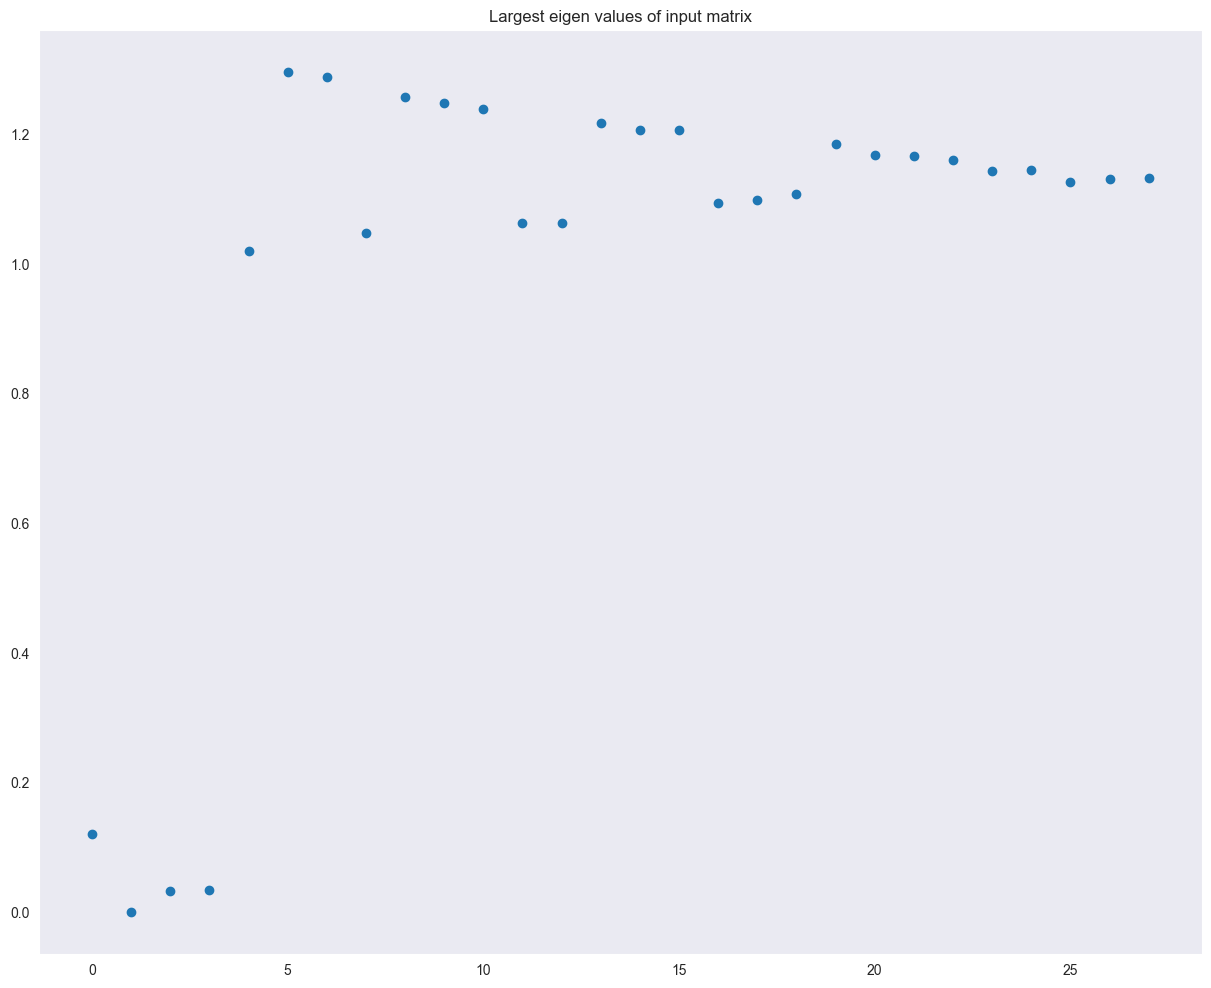

2024-06-20 13:02:46,074 - root - INFO - 最优簇数是 [ 4  5  8 13 19]
2024-06-20 13:02:46,074 - root - INFO - 最优簇数是 [ 4  5  8 13 19]
2024-06-20 13:02:46,076 - root - INFO - BDACL merge cluster with rule2....
2024-06-20 13:02:46,076 - root - INFO - BDACL merge cluster with rule2....
2024-06-20 13:02:46,080 - root - INFO - merge_rule2....
2024-06-20 13:02:46,080 - root - INFO - merge_rule2....
2024-06-20 13:02:46,530 - root - INFO - merging cluster set:[{0, 2, 10, 16, 23, 24, 25, 26, 27}, {1, 3, 4, 18, 19}, {5, 6, 7, 9, 13, 14, 22}, {8, 11, 12, 15, 17, 20, 21}]
2024-06-20 13:02:46,530 - root - INFO - merging cluster set:[{0, 2, 10, 16, 23, 24, 25, 26, 27}, {1, 3, 4, 18, 19}, {5, 6, 7, 9, 13, 14, 22}, {8, 11, 12, 15, 17, 20, 21}]
2024-06-20 13:02:46,533 - root - INFO - 为BDACL培训构建嵌入网络
2024-06-20 13:02:46,533 - root - INFO - 为BDACL培训构建嵌入网络
2024-06-20 13:02:47,272 - root - INFO - EmbeddingNet(
  (actn): ReLU()
  (fc): Sequential(
    (0): Linear(in_features=1000, out_features=256, bias=True)
    (1

In [3]:
adata_raw.obs.rename(columns={"Batch": "BATCH", "Group": "celltype"}, inplace=True)
print(adata_raw)
save_dir="./test_result/new_raw++/"
BDACL=BDACLModel(save_dir=save_dir)
adata=BDACL.deintegrate(adata=adata_raw)

... storing 'SubBatch' as categorical


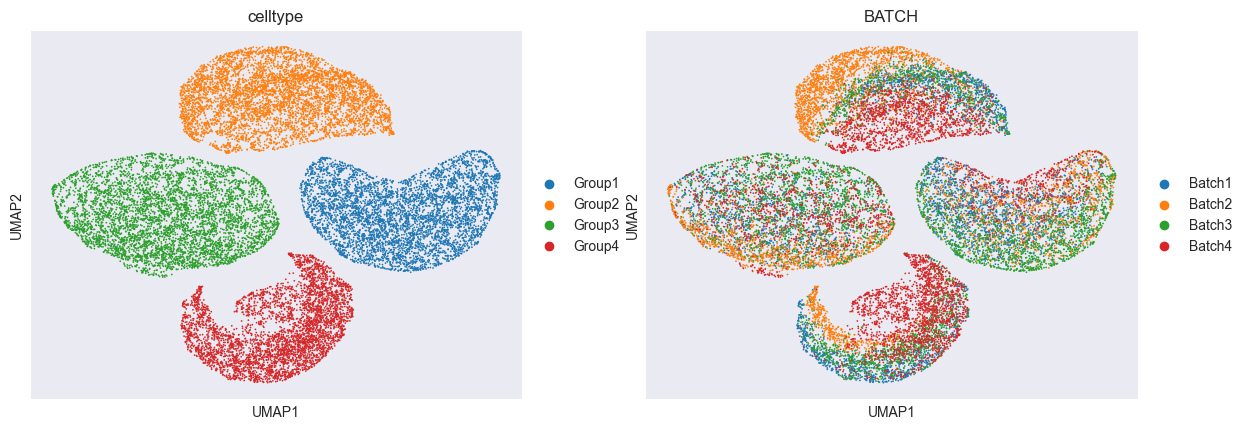

In [4]:
sc.pp.neighbors(adata,use_rep="X_emb",random_state=0)
sc.tl.umap(adata)
sc.pl.umap(adata,color=["celltype","BATCH"])

In [5]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score
ari=adjusted_rand_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
nmi=normalized_mutual_info_score(adata.obs["reassign_cluster"],adata.obs["celltype"])
print("ARI={}".format(ari))
print("NMI={}".format(nmi))

ARI=1.0
NMI=1.0
